In [132]:
# Importar e instalar paquetes necesarios
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [133]:
#cargar datos
data = pd.read_csv('/content/Cars93.csv')
data.keys()

Index(['Unnamed: 0', 'Manufacturer', 'Model', 'Type', 'Min.Price', 'Price',
       'Max.Price', 'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain',
       'Cylinders', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile',
       'Man.trans.avail', 'Fuel.tank.capacity', 'Passengers', 'Length',
       'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room',
       'Weight', 'Origin', 'Make'],
      dtype='object')

In [134]:
data = data.drop(['Unnamed: 0','Min.Price','Max.Price'],axis=1)
data.head(5)

,Manufacturer,Model,Type,Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,15.9,25,31,None,Front,4,1.8,140,6300,2890,Yes,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,Acura,Legend,Midsize,33.9,18,25,Driver & Passenger,Front,6,3.2,200,5500,2335,Yes,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,Audi,90,Compact,29.1,20,26,Driver only,Front,6,2.8,172,5500,2280,Yes,16.9,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,Audi,100,Midsize,37.7,19,26,Driver & Passenger,Front,6,2.8,172,5500,2535,Yes,21.1,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,BMW,535i,Midsize,30.0,22,30,Driver only,Rear,4,3.5,208,5700,2545,Yes,21.1,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [135]:
#curar datos
data.isnull().sum()

Manufacturer           0
Model                  0
Type                   0
Price                  0
MPG.city               0
MPG.highway            0
AirBags                0
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         2
Luggage.room          11
Weight                 0
Origin                 0
Make                   0
dtype: int64

In [136]:
# Elegir X y Y
keys = ['EngineSize', 'Manufacturer','Type', 'Horsepower', 'Passengers'] # Se eligieron estos parametros por intuicion, se cambiaran en caso de que la presicion no sea adecuada
y = ['Price']

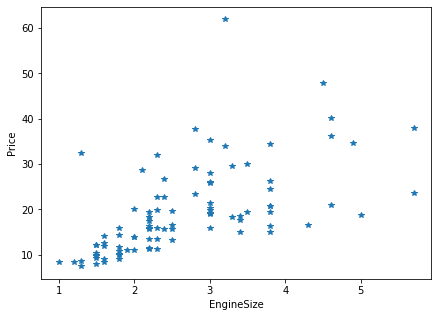

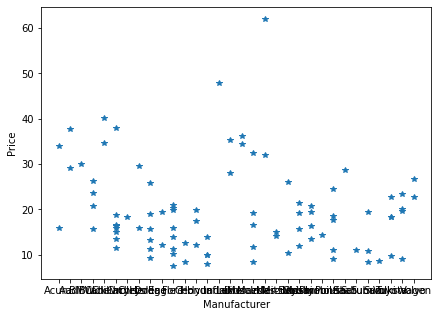

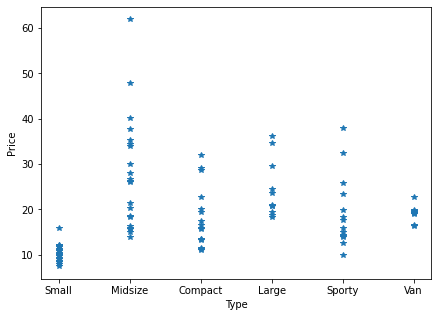

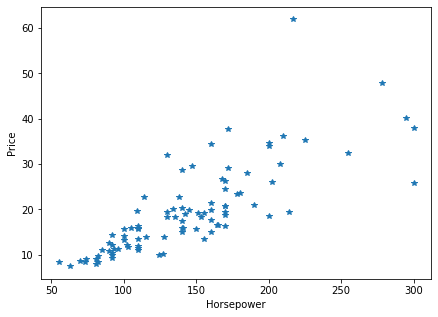

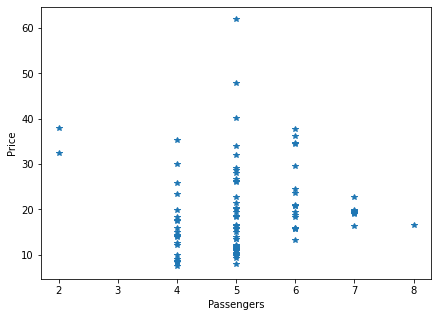

In [137]:
# Visualización datos
for k in keys:
  fig = plt.figure(figsize=(7,5))
  plt.plot(data[k],data[y],'*')
  plt.xlabel(k)
  plt.ylabel('Price')
  plt.show  

In [138]:
#Reducir a problema con tres tipos de precios: bajo, medio, alto

Y =np.array(data[y])
np.unique(Y, return_counts=True)
Y[Y<15]=0 #bajo

Y[Y>=30] = 2 #alto
Y[Y>=15] = 1 #medio

In [139]:
np.unique(Y,return_counts=True)

(array([0., 1., 2.]), array([33, 47, 13]))

<function matplotlib.pyplot.show>

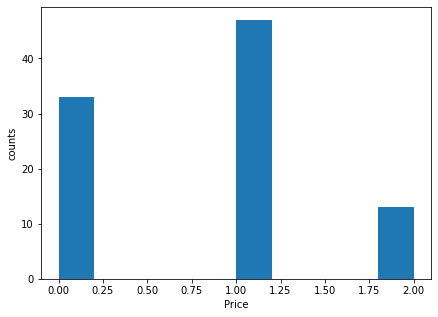

In [140]:
fig = plt.figure(figsize=(7,5))
plt.hist(Y)
plt.xlabel('Price')
plt.ylabel('counts')
plt.show

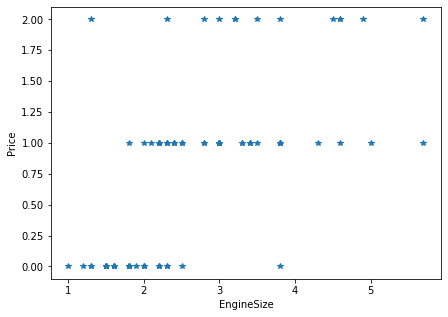

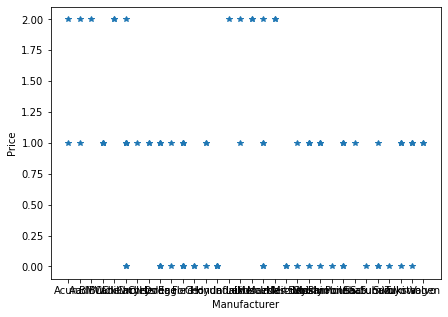

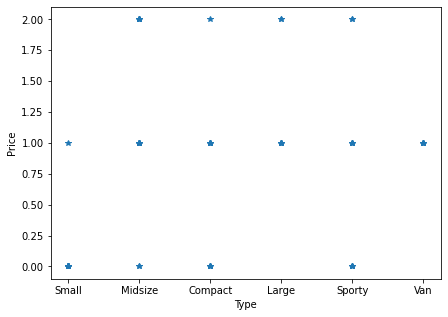

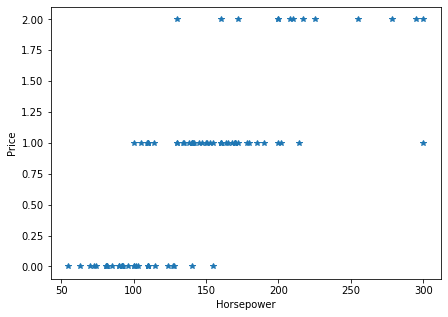

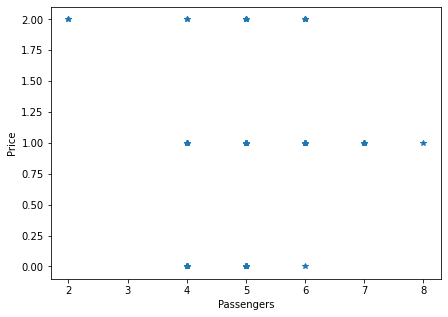

In [141]:
#inspeccion visual binaria

for k in keys:
  fig = plt.figure(figsize=(7,5))
  plt.plot(data[k],Y,'*')
  plt.xlabel(k)
  plt.ylabel('Price')
  plt.show 

In [142]:
!pip install corner

In [143]:
manufacturer = np.array(data['Manufacturer'])
a,b = np.unique(manufacturer,return_counts=True)
for i in range(len(a)):
  data.Manufacturer[data.Manufacturer == a[i]] = i

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [144]:
tipo = np.array(data['Type'])
a,b = np.unique(tipo,return_counts=True)
for i in range(len(a)):
  data.Type[data.Type == a[i]] = i




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


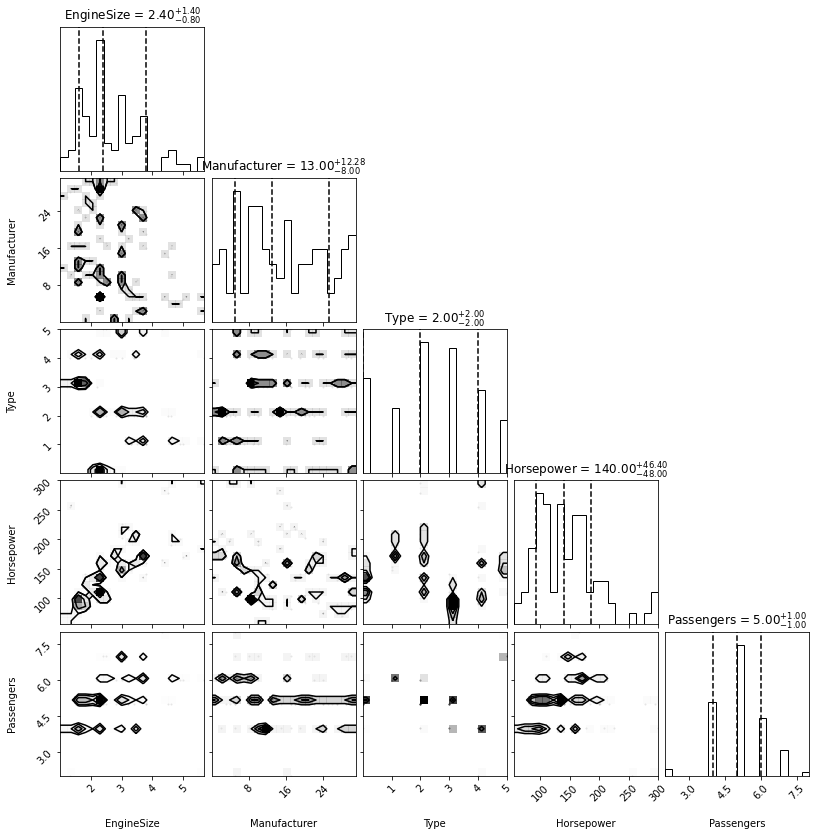

In [145]:
firgure = corner.corner(data[keys], labels=keys, quantiles=[0.16,0.5,0.84],show_titles=True)

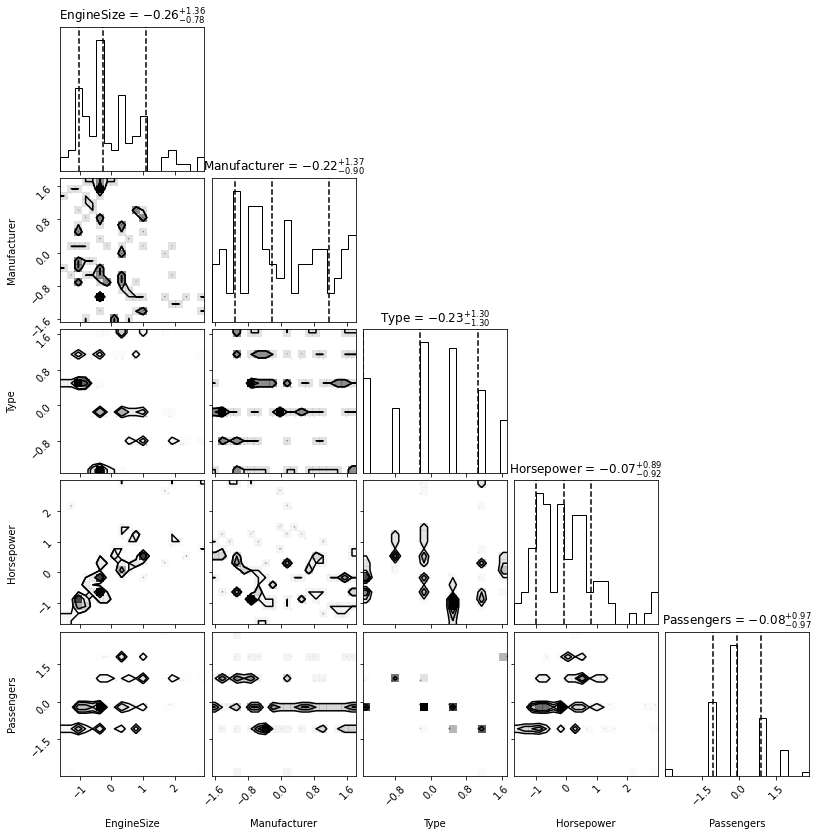

In [146]:
data_scaled = StandardScaler().fit_transform(data[keys])
firgure = corner.corner(data_scaled, labels=keys, quantiles=[0.16,0.5,0.84],show_titles=True)

#Hipótesis
### Los parámetros más importantes para determinar el precio de un carro son los caballos de fuerza y el número de pasajeros. Además se observa una correlación entre caballos de fuerza y tamaño del motor.

In [147]:
Xtrain,Xtest, Ytrain, Ytest = train_test_split(data_scaled,Y)

In [148]:
model = RandomForestClassifier(n_estimators=100, max_depth=10)

In [149]:
model.fit(Xtrain,Ytrain)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [150]:
Y_pred = model.predict(Xtest)

In [151]:
# Probar prediccion

acc = sum(Y_pred == np.ravel(Ytest))/len(Ytest)
acc

0.7916666666666666

In [152]:
importances = model.feature_importances_
importances

array([0.29714244, 0.14916458, 0.07054954, 0.40921779, 0.07392565])

In [153]:
ii = np.argsort(importances)[::-1]
np.array(keys)[ii]

array(['Horsepower', 'EngineSize', 'Manufacturer', 'Passengers', 'Type'],
      dtype='<U12')

#Conclusiones
### Uno de los parámetros de mi hipótesis fue el más importante, caballos de fuerza, seguido por tamaño del motor como esperaba debido a que estaban correlacionados, el otro parámetro que predije, número de pasajeros, no fue tan importante. Por otro lado, pienso que fue difícil observar la importancia de el manufacturador debido a que había demasiados lo cual dificultó la observación de su importancia por medi de las gráficas.